In this notebook we will clean the data and prepare it for training.

We're using the [CIC-IDS 2017](https://www.unb.ca/cic/datasets/ids-2017.html) dataset presented, in 2017, by the Canadian Institute for Cybersecurity (CIC) from the University of New Brunswick (UNB).

It can be fully downloaded from [here](http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/), precisely the zip file named *MachineLearningCSV.zip*.

You can run the next cell to download the dataset and extract it to a folder named dataset

In [ ]:
! wget http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/MachineLearningCSV.zip
! unzip MachineLearningCSV.zip -d dataset

# 1. Data Cleaning

### 01. Concatinate all  files

The dataset has 7 files containing the recorded traffic for 5 days, so the first step we do is to group all of those in one big file.

In [1]:
import os
import pandas as pd

pd.set_option("display.max_columns", None)

dataset_folder = "../dataset"

files = os.listdir(
    dataset_folder
)  # ordering doesn't matter 'casue we will shuffle all the data later

df = pd.read_csv(os.path.join(dataset_folder, files[0]))
for file in os.listdir(dataset_folder)[1:]:
    print(file)
    d = pd.read_csv(os.path.join(dataset_folder, file))
    df = pd.concat([df, d], axis=0)

del d  # free some space from memory

df.reset_index(drop=True, inplace=True)

Wednesday-workingHours.pcap_ISCX.csv
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Monday-WorkingHours.pcap_ISCX.csv
Tuesday-WorkingHours.pcap_ISCX.csv
Friday-WorkingHours-Morning.pcap_ISCX.csv


The first thing to note is CIC-IDS 2017 dataset contains a **HUGE** volume of data (2,830,743 rows and 79 columns).

*It takes 1.7+ GB of memory usage*.

In [2]:
df.shape

(2830743, 79)

In [3]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7595.104640,67.122468,15075.50000,104051.399700,948537,0,1266342,31658.550,159355.2595,996324,2,317671,7387.697674,19636.44809,104616,1,0,0,0,0,1328,1424,32.376720,34.745748,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.975610,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7289.936810,64.425518,15706.58333,104861.870100,955790,1,1319353,32983.825,159247.9008,996423,1,363429,8451.837209,21337.26261,104815,1,0,0,0,0,1328,1424,31.075838,33.349680,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.975610,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,12500.000000,160.00000,0.000000,160,160,0,0.000,0.0000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,32,32,6250.000000,6250.000000,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,1,0.000000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,1,0,290,243,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,976,0,157.952381,319.121427,7182.267884,63.675308,15896.19512,106554.899000,956551,0,1303488,32587.200,160397.0499,997357,1,346851,8459.780488,23962.23892,138295,0,0,0,0,0,1328,1360,31.454068,32.221240,0,976,111.452381,241.642792,58391.23867,0,0,0,1,0,0,0,0,1,112.795181,66.536585,157.952381,1328,0,0,0,0,0,0,41,2728,42,6634,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,38961.038960,38.50000,14.849242,49,28,0,0.000,0.0000,0,0,49,49.000000,0.00000,49,49,0,0,0,0,32,64,12987.012990,25974.025970,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,2,0.000000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,2,0,243,290,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

### 02. Reformating columns
A list of all columns description can be found [here](https://github.com/ahlashkari/CICFlowMeter/blob/master/ReadMe.txt).

The column names contain some white spaces and capital letters which is not practical, so we reformat them.

In [5]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [6]:
df.columns = df.columns.map(lambda x: "_".join(x.lower().strip().split(" ")))
df.columns

Index(['destination_port', 'flow_duration', 'total_fwd_packets',
       'total_backward_packets', 'total_length_of_fwd_packets',
       'total_length_of_bwd_packets', 'fwd_packet_length_max',
       'fwd_packet_length_min', 'fwd_packet_length_mean',
       'fwd_packet_length_std', 'bwd_packet_length_max',
       'bwd_packet_length_min', 'bwd_packet_length_mean',
       'bwd_packet_length_std', 'flow_bytes/s', 'flow_packets/s',
       'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 'flow_iat_min',
       'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max',
       'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean', 'bwd_iat_std',
       'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags',
       'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length',
       'bwd_header_length', 'fwd_packets/s', 'bwd_packets/s',
       'min_packet_length', 'max_packet_length', 'packet_length_mean',
       'packet_length_std', 'packet_length_variance', 'fin_flag_count',
       'syn_flag_co

### 03. Remove socket information

Many researchers suggest to not use socket information (like source port, destination port and IP addresses) to train IDS so we are not needed for `destination_port` column. 

In [7]:
df.drop(
    columns=["destination_port"], inplace=True
)  # drop the 'destination_port' column

### 04. Duplicate columns

The dataset contains two duplicate columns: `fwd_header_length` and `fwd_header_length.1`. We remove the latter.

In [8]:
# Verify the duplicate columns.
df[
    df["fwd_header_length.1"] != df["fwd_header_length"]
]  # select all the rows where the values in those two columns are not equal

,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes/s,flow_packets/s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets/s,bwd_packets/s,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down/up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,fwd_header_length.1,fwd_avg_bytes/bulk,fwd_avg_packets/bulk,fwd_avg_bulk_rate,bwd_avg_bytes/bulk,bwd_avg_packets/bulk,bwd_avg_bulk_rate,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label


In [9]:
df.drop(
    columns=["fwd_header_length.1"], inplace=True
)  # drop the 'fwd_header_length.1' column

### 05. Zero columns

The are 8 complete zero columns for all the entries:

In [10]:
stats = df.describe()
stats

,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes/s,flow_packets/s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets/s,bwd_packets/s,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down/up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,fwd_avg_bytes/bulk,fwd_avg_packets/bulk,fwd_avg_bulk_rate,bwd_avg_bytes/bulk,bwd_avg_packets/bulk,bwd_avg_bulk_rate,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.829385e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2.830743e+06,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,8.708495e+02,4.104958e+01,3.059493e+02,3.353257e+02,inf,inf,1.298449e+06,2.919271e+06,9.182475e+06,1.623796e+05,1.448296e+07,2.610193e+06,3.266957e+06,9.042939e+06,1.021893e+06,9.893830e+06,1.805784e+06,1.485973e+06,4.684692e+06,9.672614e+05,4.644646e-02,0.0,1.112782e-04,0.0,-2.599739e+04,-2.273275e+03,6.386535e+04,6.995192e+03,1.643450e+01,9.504024e+02,1.719444e+02,2.949756e+02,4.861548e+05,3.537976e-02,4.644646e-02,2.423392e-04,2.980705e-01,3.158443e-01,9.482316e-02,1.112782e-04,2.433990e-04,6.835004e-01,1.919837e+02,5.820194e+01,3.059493e+02,0.0,0.0,0.0,0.0,0.0,0.0,9.361160e+00,5.492919e+02,1.039377e+01,1.616230e+04,6.989837e+03,1.989433e+03,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,1.946367e+03,6.886260e+01,6.052568e+02,8.396932e+02,NaN,NaN,4.507944e+06,8.045870e+06,2.445954e+07,2.950282e+06,3.357581e+07,9.525722e+06,9.639055e+06,2.452916e+07,8.591436e+06,2.873661e+07,8.887197e+06,6.278469e+06,1.716095e+07,8.308983e+06,2.104500e-01,0.0,1.054826e-02,0.0,2.105286e+07,1.452209e+06,2.475371e+05,3.815170e+04,2.523772e+01,2.028229e+03,3.054915e+02,6.318001e+02,1.647490e+06,1.847378e-01,2.104500e-01,1.556536e-02,4.574107e-01,4.648513e-01,2.929706e-01,1.054826e-02,1.559935e-02,6.804920e-01,3.318603e+02,1.860912e+02,6.052568e+02,0.0,0.0,0.0,0.0,0.0,0.0,7.496728e+02,9.980070e+03,9.973883e+02,2.263057e+06,1.433873e+04,8.456883e+03,6.364257e+02,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.3630

In [11]:
zero_columns = stats.loc[:, (stats.loc["min"] == 0) & ((stats.loc["max"] == 0))]
zero_columns

,bwd_psh_flags,bwd_urg_flags,fwd_avg_bytes/bulk,fwd_avg_packets/bulk,fwd_avg_bulk_rate,bwd_avg_bytes/bulk,bwd_avg_packets/bulk,bwd_avg_bulk_rate
count,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0,2830743.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
zero_columns.columns

Index(['bwd_psh_flags', 'bwd_urg_flags', 'fwd_avg_bytes/bulk',
       'fwd_avg_packets/bulk', 'fwd_avg_bulk_rate', 'bwd_avg_bytes/bulk',
       'bwd_avg_packets/bulk', 'bwd_avg_bulk_rate'],
      dtype='object')

In [13]:
len(zero_columns.columns)

8

In [14]:
df.drop(columns=zero_columns.columns, inplace=True)  # drop all complete zero columns

### 06. NaN values

The only column that has null values is `flow_bytes/s` with a total of 1358 rows, the label for those rows are of the top majority classes: `BENIGN` and `DoS Hulk` so we will simply drop them.

In [15]:
df.columns[df.isna().any()]

Index(['flow_bytes/s'], dtype='object')

In [16]:
df["flow_bytes/s"].isna().sum()

1358

In [17]:
df.loc[df["flow_bytes/s"].isna(), "label"].value_counts()

DoS Hulk    949
BENIGN      409
Name: label, dtype: int64

In [18]:
df.dropna(inplace=True)

### 07. Inf values

We have 2 columns with `inf` values: `flow_bytes/s` and `flow_packets/s` , we will replace the `inf` with a total of 1509 rows. We drop them too.

In [19]:
import numpy as np

inf_cols = stats.loc[:, stats.loc["max"] == np.inf]
inf_cols

,flow_bytes/s,flow_packets/s
count,2.829385e+06,2.830743e+06
mean,inf,inf
std,NaN,NaN
min,-2.610000e+08,-2.000000e+06
25%,1.193197e+02,3.446226e+00
50%,4.595549e+03,1.106684e+02
75%,1.666667e+05,2.325581e+04
max,inf,inf


In [20]:
df.loc[(df["flow_packets/s"] == np.inf) | (df["flow_bytes/s"] == np.inf), "label"].size

1509

In [21]:
df.loc[
    (df["flow_packets/s"] == np.inf) | (df["flow_bytes/s"] == np.inf), "label"
].value_counts()

BENIGN         1368
PortScan        126
Bot              10
FTP-Patator       3
DDoS              2
Name: label, dtype: int64

In [22]:
# Replace inf values with null
df["flow_bytes/s"].replace(np.inf, np.nan, inplace=True)
df["flow_packets/s"].replace(np.inf, np.nan, inplace=True)

# Remove rows with null values
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

### 08. Binary labels

CIC-IDS 2017 is highly imbalanced, it have a majority class (BENIGN) which takes 80% of the full dataset and the other 20% is distrubuted over 14 type of attacks. 

Some attacks presents less than 0.0005% of the dataset.

For our case, we'll focus on binary classification (benign and attack). So we map each attack to the label '1' and each bnign traffic to the label '0'

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

We have 15 different class:
['BENIGN' 'DoS Hulk' 'PortScan' 'DDoS' 'DoS GoldenEye' 'FTP-Patator'
 'SSH-Patator' 'DoS slowloris' 'DoS Slowhttptest' 'Bot'
 'Web Attack � Brute Force' 'Web Attack � XSS' 'Infiltration'
 'Web Attack � Sql Injection' 'Heartbleed']

Their distribution is as follows:
BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: label, dtype: int64

And with percentages is:
BENIGN                        0.803189
DoS Hulk                      0.081377
PortSc

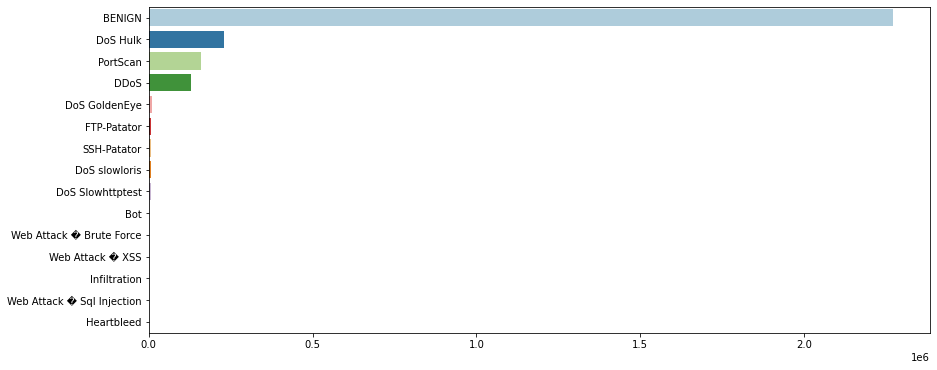

In [24]:
counts = df["label"].value_counts()
print(f"We have {len(counts.index)} different class:\n{counts.index.values}")

print(f"\nTheir distribution is as follows:\n{counts}")

print(f"\nAnd with percentages is:\n{counts / df.shape[0]}")

plt.figure(figsize=(14, 6))
sns.barplot(y=counts.index, x=counts.values, orient="h", palette="Paired");

For binary labels we have:

Counts:
0    2271320
1     556556
Name: label, dtype: int64

Percentage:
0    0.803189
1    0.196811
Name: label, dtype: float64


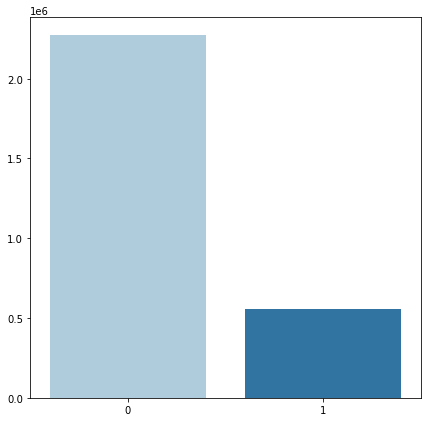

In [25]:
df["label"] = df["label"].map(
    lambda x: 0 if x == "BENIGN" else 1
)  # map labels to binary, 'BENIGN' <- 0  and 'Attack' <- 1

bi_counts = df["label"].value_counts()
print(f"Counts:\n{bi_counts}")
print(f"\nPercentage:\n{bi_counts/ df.shape[0]}")

plt.figure(figsize=(7, 7))
sns.barplot(x=bi_counts.index, y=bi_counts.values, orient="v", palette="Paired");

The final shape of the dataset is:

In [26]:
df.shape

(2827876, 69)

# 2. Feature selection

while training, the huge size of data compared to our capacity (8GB of RAM) didn't allow us to train the model for a considered time. Hence, we need to reduce the size of the dataset more.

We decided to keep only the columns that have a high impact on classification. Thus, we use the 23 selected features from the CIC-IDS 2017 original [paper](https://www.scitepress.org/Papers/2018/66398/66398.pdf).

In [27]:
features = [
    "bwd_packet_length_min",
    "subflow_fwd_bytes",
    "total_length_of_fwd_packets",
    "fwd_packet_length_mean",
    "bwd_packet_length_std",
    "flow_iat_min",
    "fwd_iat_min",
    "flow_iat_mean",
    "flow_duration",
    "flow_iat_std",
    "active_min",
    "active_mean",
    "bwd_iat_mean",
    "fwd_iat_mean",
    "init_win_bytes_forward",
    "ack_flag_count",
    "fwd_psh_flags",
    "syn_flag_count",
    "fwd_packets/s",
    "init_win_bytes_backward",
    "bwd_packets/s",
    "psh_flag_count",
    "packet_length_mean",
]

In [28]:
len(features)

23

In [29]:
df = df[features + ["label"]]

In [30]:
df.shape

(2827876, 24)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2827876 entries, 0 to 2827875
Data columns (total 24 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   bwd_packet_length_min        int64  
 1   subflow_fwd_bytes            int64  
 2   total_length_of_fwd_packets  int64  
 3   fwd_packet_length_mean       float64
 4   bwd_packet_length_std        float64
 5   flow_iat_min                 int64  
 6   fwd_iat_min                  int64  
 7   flow_iat_mean                float64
 8   flow_duration                int64  
 9   flow_iat_std                 float64
 10  active_min                   int64  
 11  active_mean                  float64
 12  bwd_iat_mean                 float64
 13  fwd_iat_mean                 float64
 14  init_win_bytes_forward       int64  
 15  ack_flag_count               int64  
 16  fwd_psh_flags                int64  
 17  syn_flag_count               int64  
 18  fwd_packets/s                float64
 19  

# 3. Train, Validation, Test splits
We split the dataset into 3 subsets: train(60%), validation(20%), and, test(20%).

In [32]:
df.shape[0] * 0.2

565575.2000000001

In [33]:
df.shape[0] * 0.6

1696725.5999999999

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, :-1], df["label"], test_size=0.2, shuffle=True
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, shuffle=True
)

# 04. Scaling
We scale the data to be in the range [0, 1] using the formula:
$$x' = \frac{x - min(x)}{max(x) - min(x)}$$

where $x$ is the original value and $x'$ is the scaled value.

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train.iloc[:, :])

X_train.iloc[:, :] = scaler.transform(X_train.iloc[:, :])
X_val.iloc[:, :] = scaler.transform(X_val.iloc[:, :])
X_test.iloc[:, :] = scaler.transform(X_test.iloc[:, :])

# Save the data:

In [36]:
pd.concat([X_train, y_train], axis=1).to_csv("processed_data/train.csv", index=None)
pd.concat([X_test, y_test], axis=1).to_csv("processed_data/test.csv", index=None)
pd.concat([X_val, y_val], axis=1).to_csv("processed_data/val.csv", index=None)